In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\syeda\OneDrive\Desktop\Excel files_data set\credit_risk_dataset_X batch assignment.csv')

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.shape

(32581, 12)

In [10]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Introduction

Financial markets are fundamental institutions in any developing economy. They
play a crucial role in promoting economic growth by facilitating the channeling of
saving decisions into productive investment. A major concern for financial
institutions is credit risk, because if not managed properly, it can lead to a
banking collapse.
In our banking system, banks have many products to sell but the main source of
income of any bank is on its credit line. Loan is the core business part of banks.
A bank's profit or a loss depends to a large extent on loans i.e. whether the
customers are paying back the loan or defaulting.
Though a lot of people are applying for loans. However, they may have some
difficulty in repaying the loan, due to their own capability to repay loan, their
personal monetary terms, etc.. It’s hard to select the genuine applicant, who will
repay the loan. While doing the process manually, a lot of misconception may
happen to select the genuine applicant. The banks hold the risk of losing the
amount loaned to the borrowers, which is basically regarded as "Credit risk".
Credit risk is the potential that a bank’s borrower or counterparty fails to meet its
obligations in repaying the loan borrowed from the financial institutions ("banks").
By predicting the loan defaulters, the bank can reduce its Non-Performing
Assets. This makes the study of this phenomenon very important.
Thus, the banks need to manage the credit risks in their portfolio both at the
individual borrower and transactional level, as well as to consider the linkage
between credit risks and other types of risk. This is because these are criteria to
assess the success/failure of any banking lending activities.
Many research confirmed that machine learning technology is highly efficient to
predict this situation. This technique is applied through learning from previous
data.

# Objective - Objective is to perform Exploratory Data Analysis(EDA) on the given dataset to learn the patterns and identify the "Credit risk".

# Fixing the data types of columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
df['loan_status'] = df['loan_status'].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  object 
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


# Missing values

## Missing completely ay random:

### 1.Missingness is unrelated to any variables in the dataset. you can treat MCAR missing values by simply removing the rows with missing values or imputing them with statistical measures such as mean,median or mode.

In [14]:
df.isnull().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


# Impute missing values with mean

df_mean_imputed = df.fillna(df.mean())

df_mean_imputed.describe()

In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [18]:
mean_loan_int_rate = df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(mean_loan_int_rate, inplace= True)

In [19]:
df.isnull().sum().sort_values(ascending=False)

person_emp_length             895
person_age                      0
person_income                   0
person_home_ownership           0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [20]:
df.shape

(32581, 12)

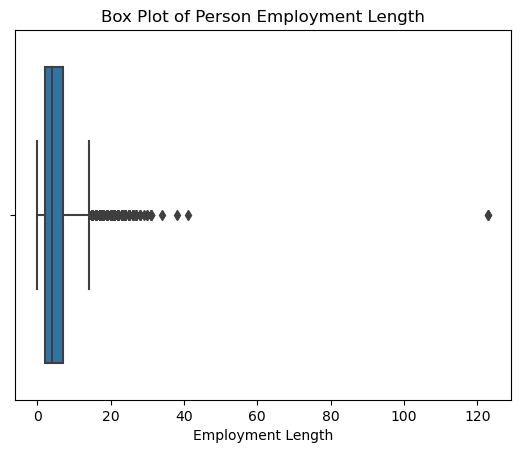

In [21]:
sns.boxplot(x='person_emp_length',data=df)
plt.title('Box Plot of Person Employment Length')
plt.xlabel('Employment Length')
plt.show()

In [22]:
df.duplicated(subset=['person_emp_length']).sum()

32544

In [23]:
df.shape

(32581, 12)

## drop the missing values

In [27]:
df.isnull().sum().sort_values(ascending=False)

person_emp_length             895
person_age                      0
person_income                   0
person_home_ownership           0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [28]:
# drop rows with missing values
df.dropna(subset=['person_emp_length'], inplace=True)

In [29]:
df.isnull().sum().sort_values(ascending=False)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.037157,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070128,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,11.011695,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


# Remove outliers from the data set from each column

In [31]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# 1. Univariate Analysis - Statistical Non Visual Analysis 

In [32]:
discrete_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['int64','float64'])

In [33]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print('*'*0, col_name, '*'*10)
        print(discrete_data[col_name].agg(['count','nunique','unique']))
        print('Value Counts:\n',discrete_data[col_name].value_counts())
        print()

In [34]:
discrete_univariate_analysis(discrete_df)

 person_home_ownership **********
count                             31686
nunique                               4
unique     [RENT, OWN, MORTGAGE, OTHER]
Name: person_home_ownership, dtype: object
Value Counts:
 RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

 loan_intent **********
count                                                  31686
nunique                                                    6
unique     [PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...
Name: loan_intent, dtype: object
Value Counts:
 EDUCATION            6290
MEDICAL              5897
VENTURE              5556
PERSONAL             5369
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: loan_intent, dtype: int64

 loan_grade **********
count                      31686
nunique                        7
unique     [D, B, C, A, E, F, G]
Name: loan_grade, dtype: object
Value Counts:
 A    10371
B    10186
C     6321
D     3556
E      952
F    

In [35]:
numerical_df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [36]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min','max','median','std']))
        print()

In [37]:
numerical_univariate_analysis(numerical_df)

********** person_age **********
min        20.000000
max       144.000000
median     26.000000
std         6.360283
Name: person_age, dtype: float64

********** person_income **********
min       4.000000e+03
max       6.000000e+06
median    5.600000e+04
std       6.242729e+04
Name: person_income, dtype: float64

********** person_emp_length **********
min         0.00000
max       123.00000
median      4.00000
std         4.14263
Name: person_emp_length, dtype: float64

********** loan_amnt **********
min         500.000000
max       35000.000000
median     8000.000000
std        6336.226458
Name: loan_amnt, dtype: float64

********** loan_int_rate **********
min        5.420000
max       23.220000
median    11.011695
std        3.070128
Name: loan_int_rate, dtype: float64

********** loan_percent_income **********
min       0.000000
max       0.830000
median    0.150000
std       0.106297
Name: loan_percent_income, dtype: float64

********** cb_person_cred_hist_length **********
min

In [38]:
discrete_univariate_analysis(discrete_df)

 person_home_ownership **********
count                             31686
nunique                               4
unique     [RENT, OWN, MORTGAGE, OTHER]
Name: person_home_ownership, dtype: object
Value Counts:
 RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

 loan_intent **********
count                                                  31686
nunique                                                    6
unique     [PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...
Name: loan_intent, dtype: object
Value Counts:
 EDUCATION            6290
MEDICAL              5897
VENTURE              5556
PERSONAL             5369
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: loan_intent, dtype: int64

 loan_grade **********
count                      31686
nunique                        7
unique     [D, B, C, A, E, F, G]
Name: loan_grade, dtype: object
Value Counts:
 A    10371
B    10186
C     6321
D     3556
E      952
F    

# univariate - Visual Analysis

In [39]:
df.shape

(31686, 12)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

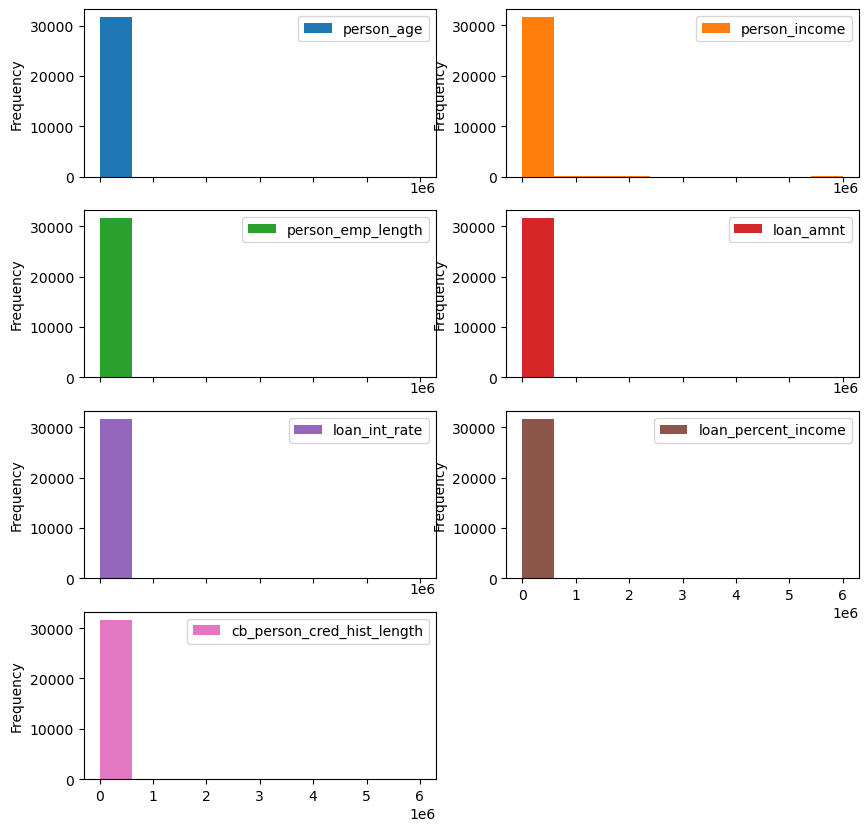

In [40]:
df.plot(kind='hist', subplots= True,layout=(4,2),figsize=(10,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

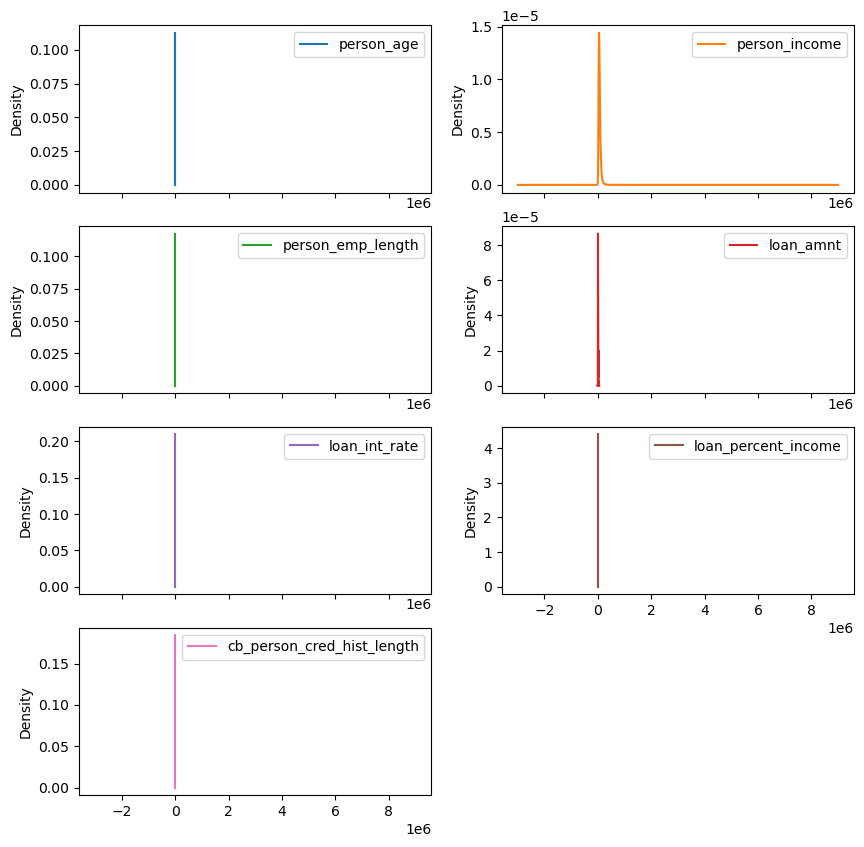

In [42]:
df.plot(kind='kde', subplots= True,layout=(4,2),figsize=(10,10))

person_age                       Axes(0.125,0.712609;0.352273x0.167391)
person_income                 Axes(0.547727,0.712609;0.352273x0.167391)
person_emp_length                Axes(0.125,0.511739;0.352273x0.167391)
loan_amnt                     Axes(0.547727,0.511739;0.352273x0.167391)
loan_int_rate                     Axes(0.125,0.31087;0.352273x0.167391)
loan_percent_income            Axes(0.547727,0.31087;0.352273x0.167391)
cb_person_cred_hist_length           Axes(0.125,0.11;0.352273x0.167391)
dtype: object

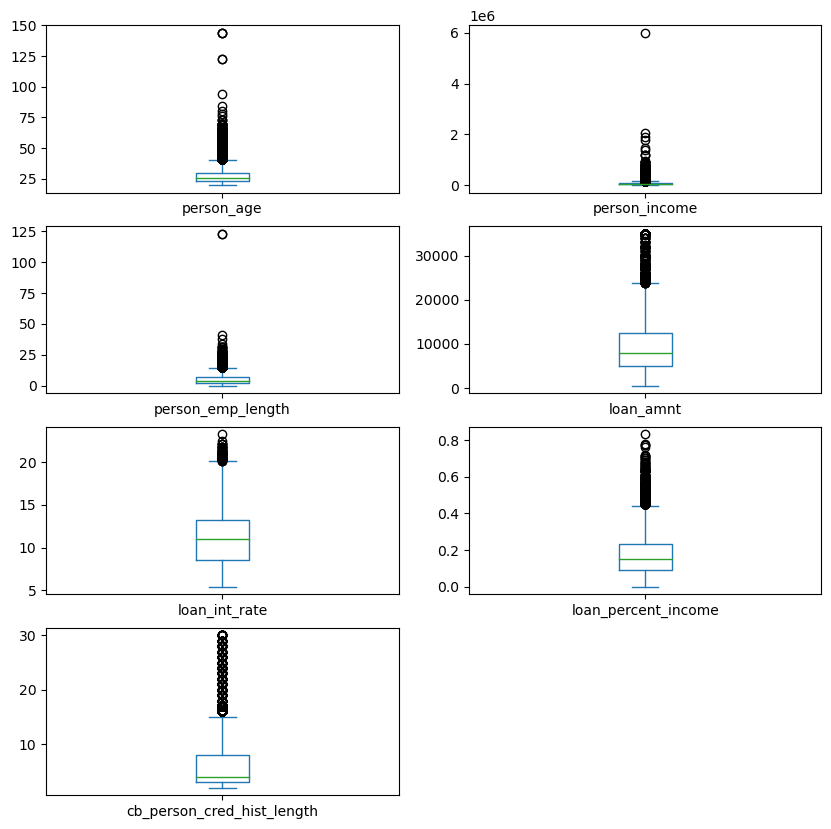

In [43]:
df.plot(kind='box', subplots= True,layout=(4,2),figsize=(10,10))

In [44]:
# need to get rid of outliers from each column

In [45]:
df = df.loc[df['person_age'] <70]
df.shape

(31667, 12)

In [46]:
df = df.loc[df['person_income'] <150000]

df.shape

(30386, 12)

In [47]:
df = df.loc[df['loan_amnt'] <35000]

df.shape

(30269, 12)

In [48]:
df = df.loc[df['person_emp_length'] <20]

df.shape

(30139, 12)

In [49]:
df = df.loc[df['loan_int_rate'] <20]

df.shape

(30074, 12)

In [50]:
df = df.loc[df['loan_percent_income'] <0.6]

df.shape

(30018, 12)

In [51]:
df = df.loc[df['cb_person_cred_hist_length'] <25]

df.shape

(29927, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 1 to 32577
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29927 non-null  int64  
 1   person_income               29927 non-null  int64  
 2   person_home_ownership       29927 non-null  object 
 3   person_emp_length           29927 non-null  float64
 4   loan_intent                 29927 non-null  object 
 5   loan_grade                  29927 non-null  object 
 6   loan_amnt                   29927 non-null  int64  
 7   loan_int_rate               29927 non-null  float64
 8   loan_status                 29927 non-null  object 
 9   loan_percent_income         29927 non-null  float64
 10  cb_person_default_on_file   29927 non-null  object 
 11  cb_person_cred_hist_length  29927 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


person_age                       Axes(0.125,0.712609;0.352273x0.167391)
person_income                 Axes(0.547727,0.712609;0.352273x0.167391)
person_emp_length                Axes(0.125,0.511739;0.352273x0.167391)
loan_amnt                     Axes(0.547727,0.511739;0.352273x0.167391)
loan_int_rate                     Axes(0.125,0.31087;0.352273x0.167391)
loan_percent_income            Axes(0.547727,0.31087;0.352273x0.167391)
cb_person_cred_hist_length           Axes(0.125,0.11;0.352273x0.167391)
dtype: object

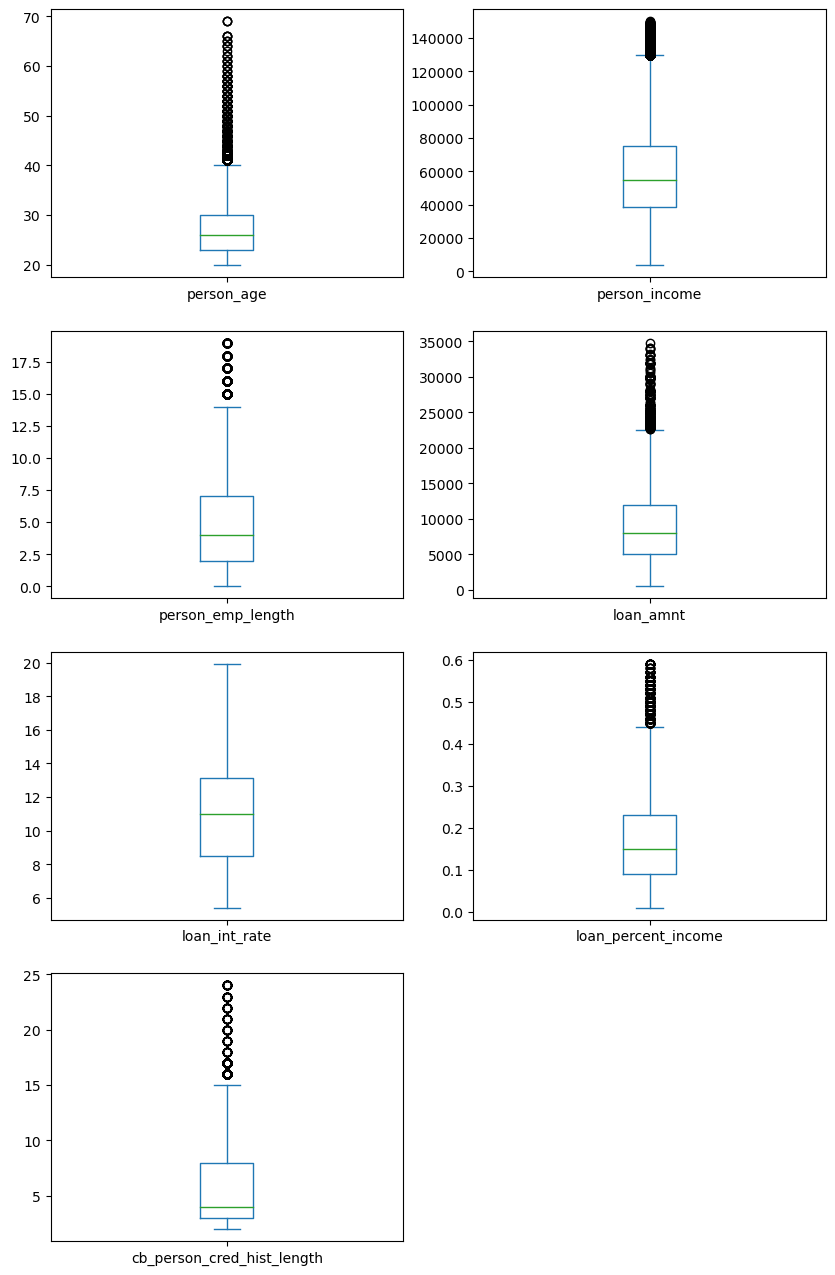

In [53]:
df.plot(kind='box', subplots= True, layout=(4, 2), figsize=(10,16))

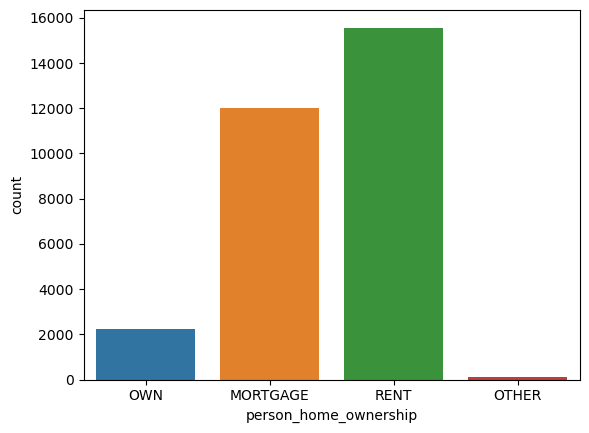

In [54]:
sns.countplot(x='person_home_ownership',data=df)
plt.show()

## Owning a home is the most common of housing in the United States, with a count of roughly 16,000. Renting comes in second at around 14,000. Mortgages are distant third at 6,000. 'Other is the least popular selection, with only 2,000 people selecting it.

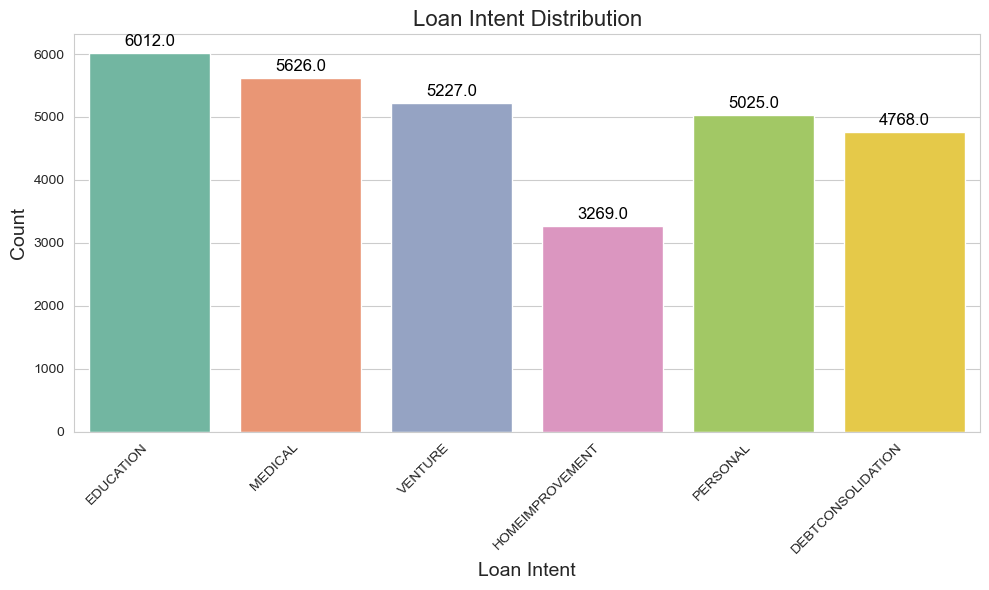

In [55]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_intent', data=df, palette='Set2')
plt.title('Loan Intent Distribution', fontsize=16)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


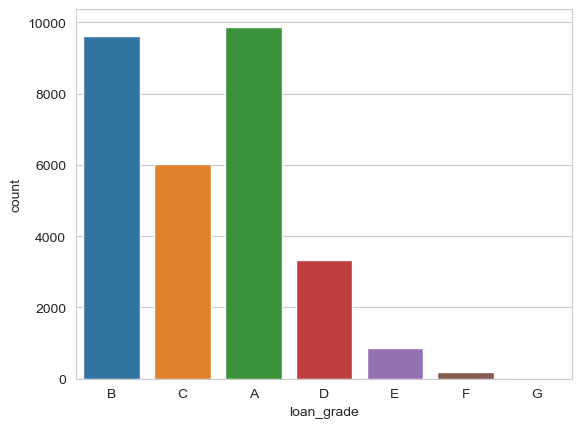

In [57]:
sns.countplot(x='loan_grade', data=df)
plt.show()

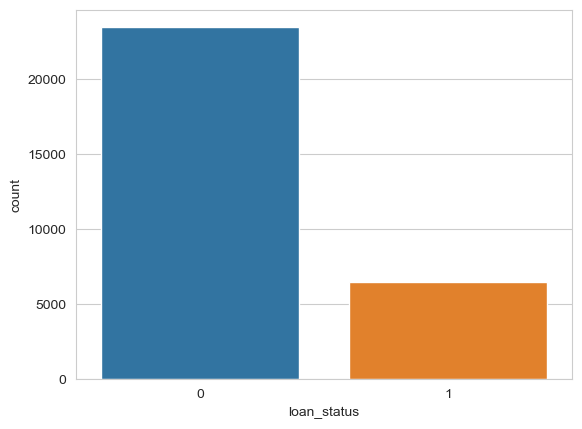

In [58]:
sns.countplot(x='loan_status', data=df)
plt.show()

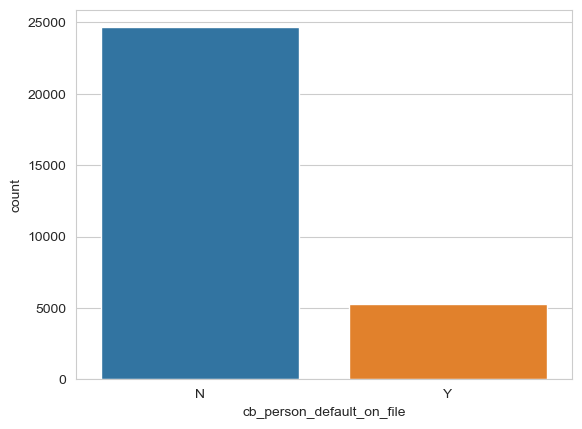

In [59]:
sns.countplot(x='cb_person_default_on_file', data=df)
plt.show()

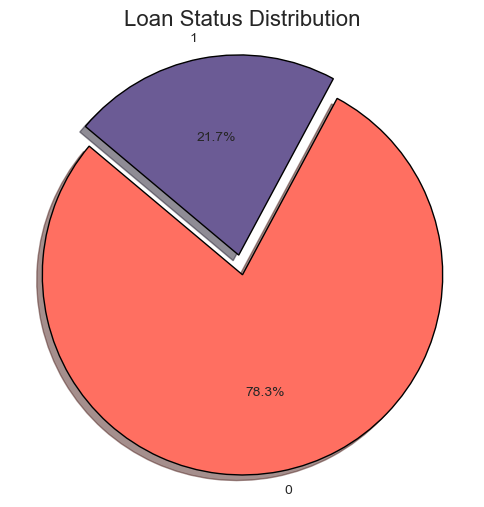

In [61]:
status_counts = df['loan_status'].value_counts()
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
explode = [0.05] * len(status_counts) 
plt.figure(figsize=(6, 6))
plt.pie(status_counts, 
        labels=status_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=custom_colors, 
        explode=explode, 
        shadow=True, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.axis('equal')  
plt.title('Loan Status Distribution', fontsize=16)
plt.show()


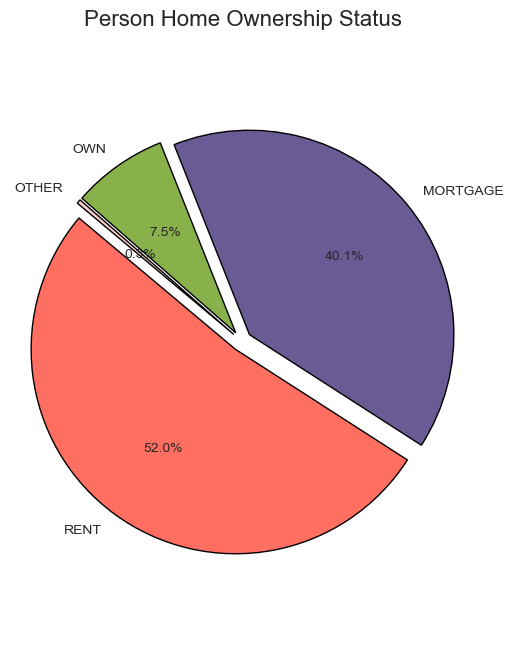

In [65]:
status_counts = df['person_home_ownership'].value_counts()
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
explode = [0.05] * len(status_counts) 
plt.figure(figsize=(6, 8))
plt.pie(status_counts, 
        labels=status_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=custom_colors, 
        explode=explode, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.axis('equal')  
plt.title('Person Home Ownership Status', fontsize=16)
plt.show()


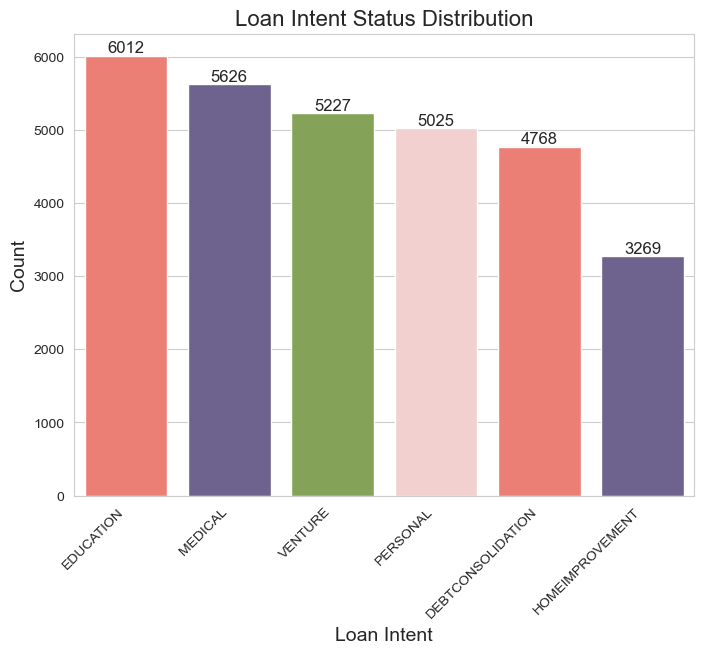

In [74]:
status_counts = df['loan_intent'].value_counts()
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=custom_colors)
plt.title('Loan Intent Status Distribution', fontsize=16)
plt.xlabel('Loan Intent', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(status_counts.values):
    plt.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=12)
plt.show()


# Same for Pie chart

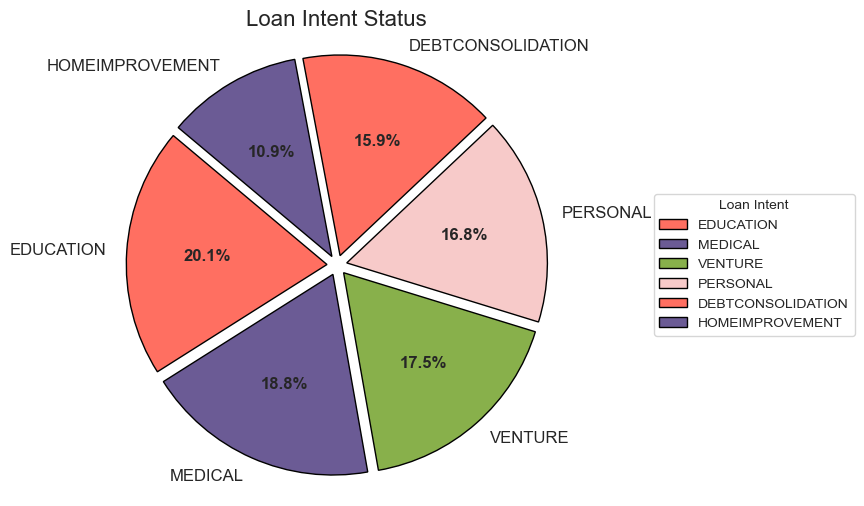

In [67]:
status_counts = df['loan_intent'].value_counts()
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
explode = [0.05] * len(status_counts)
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(status_counts, 
                                   labels=status_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=custom_colors, 
                                   explode=explode, 
                                   #shadow=True, 
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.axis('equal')  
plt.title('Loan Intent Status', fontsize=16)
plt.legend(wedges, status_counts.index, title="Loan Intent", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)
plt.show()


## Pie chart titled "Loan Intent Status". It shows the distribution of loan purposes as a percentage of the total number of loans. Here's a breakdown of the information in the chart:

+ Home Improvement: 10.9% of the loans are for home improvement.
+ Debt Consolidation: 15.9% of the loans are for debt consolidation.
+ Education: 20.1% of the loans are for financing education.
+ Personal: 18.8% of the loans are for personal reasons.
+ Medical: 16.8% of the loans are for medical purposes.
+ Venture: 7.5% of the loans are for venture purposes.


## Insights:
+ The most common loan purposes are education (20.1%) and debt consolidation (15.9%). This suggests that a significant portion of borrowers are looking for financing to improve their education or financial situation.
+ A fair share of the loans (18.8%) are also used for personal reasons, which could be anything from unexpected expenses to home improvement not covered in the dedicated category.
+ Medical loans (16.8%) and Venture loans (17.5%) come in at a close range, indicating a need for financing for medical care and home repairs.
+ Home improvement loans account for the smallest portion (10.9%) of the total.

In [75]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

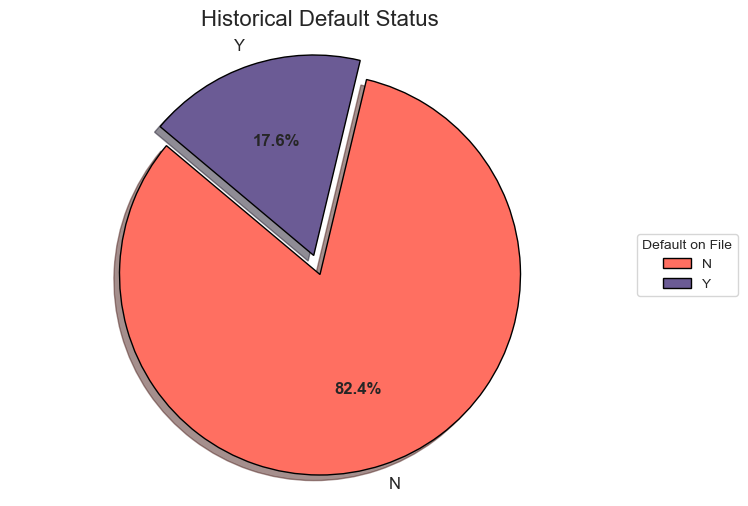

In [76]:
status_counts = df['cb_person_default_on_file'].value_counts()
custom_colors = ['#FF6F61', '#6B5B95']
explode = [0.05] * len(status_counts) 
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(status_counts, 
                                   labels=status_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=custom_colors, 
                                   explode=explode, 
                                   shadow=True, 
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.axis('equal')  
plt.title('Historical Default Status', fontsize=16)
plt.legend(wedges, status_counts.index, title="Default on File", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)
plt.show()


## The orange slice represents the percentage of applicants who have a history of defaults (17.6%), and the blue slice represents the percentage of applicants with no history of defaults (82.4%).

## Insights:

+ The majority of applicants in this dataset (82.4%) have no history of defaults on loans. This suggests that a significant portion of the applicant pool may be creditworthy.
+ However, there is also a noteworthy percentage of applicants (17.6%) with a history of defaults. This highlights the need for lenders to carefully assess loan applications to make informed decisions.

# 3.Bivariate Analysis
# a. Continuous vs Continuous Numerical Data

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 1 to 32577
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29927 non-null  int64  
 1   person_income               29927 non-null  int64  
 2   person_home_ownership       29927 non-null  object 
 3   person_emp_length           29927 non-null  float64
 4   loan_intent                 29927 non-null  object 
 5   loan_grade                  29927 non-null  object 
 6   loan_amnt                   29927 non-null  int64  
 7   loan_int_rate               29927 non-null  float64
 8   loan_status                 29927 non-null  object 
 9   loan_percent_income         29927 non-null  float64
 10  cb_person_default_on_file   29927 non-null  object 
 11  cb_person_cred_hist_length  29927 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


# Scatter plot

C:\Users\syeda\AppData\Local\Temp\ipykernel_16516\58664834.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Person Age')


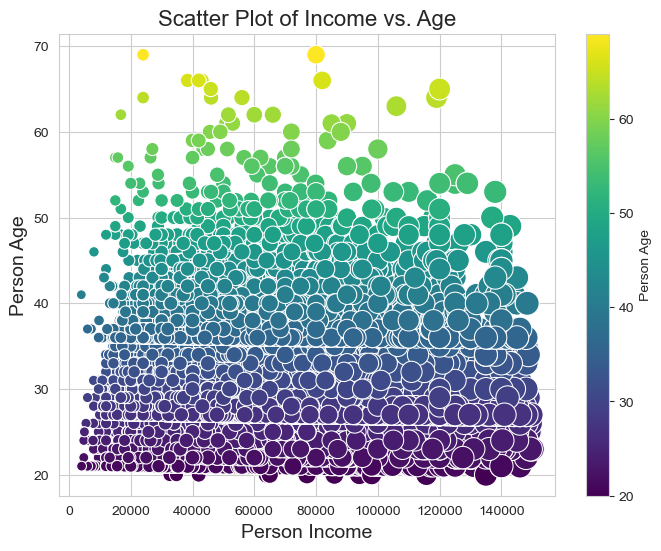

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='person_income', y='person_age', data=df, hue='person_age', palette='viridis', size='person_income', sizes=(50, 300), legend=None)
plt.title('Scatter Plot of Income vs. Age', fontsize=16)
plt.xlabel('Person Income', fontsize=14)
plt.ylabel('Person Age', fontsize=14)
norm = plt.Normalize(df['person_age'].min(), df['person_age'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar = plt.colorbar(sm, label='Person Age')
plt.show()


# Joint plot

<Figure size 800x800 with 0 Axes>

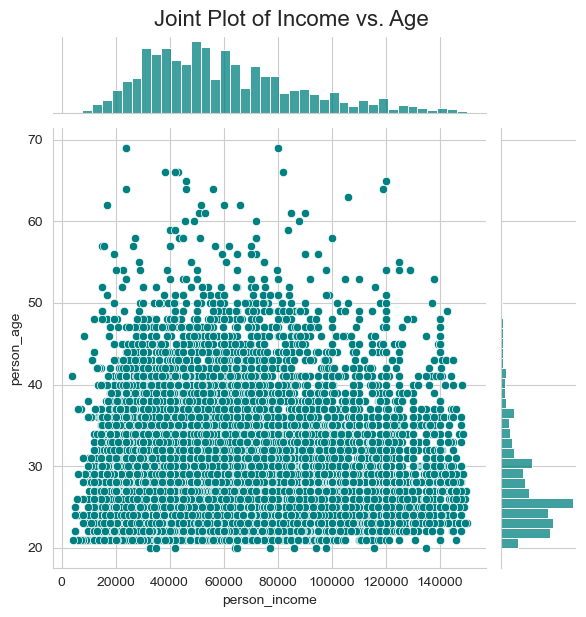

In [83]:
plt.figure(figsize=(8, 8))
sns.jointplot(x='person_income', y='person_age', data=df, kind='scatter', color='teal', marginal_kws=dict(bins=40, fill=True))
plt.suptitle('Joint Plot of Income vs. Age', y=1.02, fontsize=16)
plt.show()


# Scatter Plot

C:\Users\syeda\AppData\Local\Temp\ipykernel_16516\666399392.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Loan Amount')


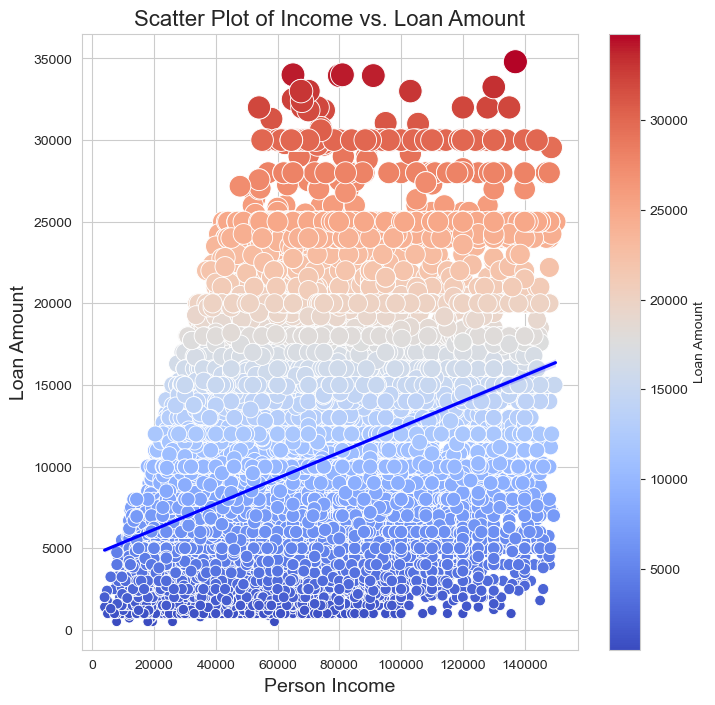

In [84]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='person_income', y='loan_amnt', data=df, hue='loan_amnt', palette='coolwarm', size='loan_amnt', sizes=(50, 300), legend=None)
sns.regplot(x='person_income', y='loan_amnt', data=df, scatter=False, color='blue', line_kws={'label': 'Trend Line'})
plt.title('Scatter Plot of Income vs. Loan Amount', fontsize=16)
plt.xlabel('Person Income', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
norm = plt.Normalize(df['loan_amnt'].min(), df['loan_amnt'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
cbar = plt.colorbar(sm, label='Loan Amount')
plt.show()


# Insights:

+ There appears to be a positive correlation between income level and loan amount. This means that borrowers with higher incomes tend to take out larger loans. This is likely because lenders are more willing to approve larger loans for borrowers who can afford higher repayments.
+ However, the data points are scattered, which means there are exceptions to this trend. There are some borrowers with high incomes who have taken out smaller loans, and there are some borrowers with lower incomes who have taken out larger loans.

In [72]:
correlation_matrix= numerical_df.corr()
correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.174755,0.163106,0.051180,0.010367,-0.041183,0.858829
person_income,0.174755,1.000000,0.134268,0.263639,-0.001317,-0.252967,0.119007
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.053780,-0.054111,0.144699
loan_amnt,0.051180,0.263639,0.113082,1.000000,0.138559,0.577200,0.042398
loan_int_rate,0.010367,-0.001317,-0.053780,0.138559,1.000000,0.117505,0.014501
loan_percent_income,-0.041183,-0.252967,-0.054111,0.577200,0.117505,1.000000,-0.030934
cb_person_cred_hist_length,0.858829,0.119007,0.144699,0.042398,0.014501,-0.030934,1.000000


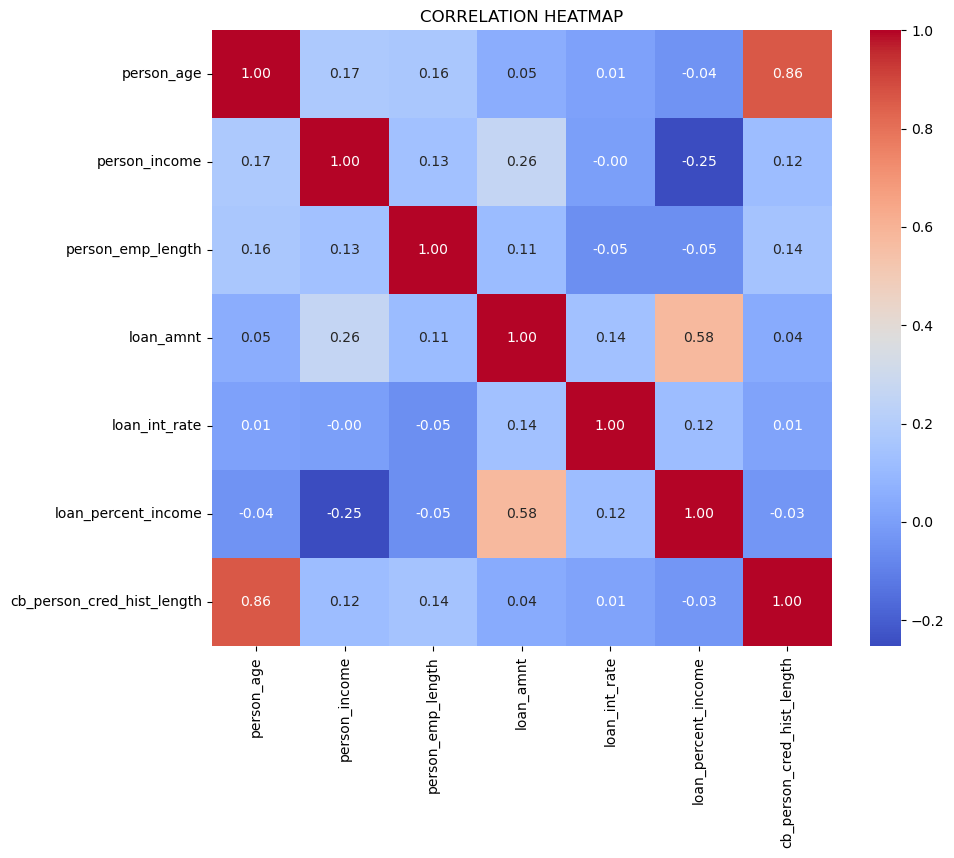

In [75]:
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('CORRELATION HEATMAP')  
plt.show()  

# Insights:

**person_age:**
Strong positive correlation with: cb_person_cred_hist_length (0.858829)
Weak positive correlations with: person_income (0.174755), person_emp_length (0.163106), loan_amnt (0.051180)
Very weak positive correlations with: loan_int_rate (0.010367), loan_percent_income (-0.041183)
Interpretation: Age shows the strongest positive correlation with credit history length, indicating that older individuals tend to have longer credit histories. There are weaker positive correlations with income, employment length, and loan amount.

**person_income:**
Weak positive correlation with: loan_amnt (0.263639)
Weak negative correlation with: loan_percent_income (-0.252967)
Very weak positive correlations with: person_age (0.174755), person_emp_length (0.134268)
Very weak negative correlation with: loan_int_rate (-0.001317)
Interpretation: Income has a weak positive correlation with loan amount and a weak negative correlation with the percentage of income dedicated to loan payments.

**person_emp_length:**
Weak positive correlation with: cb_person_cred_hist_length (0.144699)
Very weak positive correlations with: person_age (0.163106), person_income (0.134268), loan_amnt (0.113082)
Weak negative correlation with: loan_int_rate (-0.053780)
Interpretation: Employment length shows weak positive correlations with credit history length, age, income, and loan amount. There's a weak negative correlation with loan interest rate.

**loan_amnt:**
Weak positive correlation with: person_income (0.263639), loan_percent_income (0.577200)
Very weak positive correlations with: person_age (0.051180), person_emp_length (0.113082), loan_int_rate (0.138559) 
Interpretation: Loan amount has a weak positive correlation with income and a stronger positive correlation with the percentage of income dedicated to loan payments.

**loan_int_rate:**
Very weak positive correlation with: loan_amnt (0.138559)
Very weak negative correlation with: person_emp_length (-0.053780), loan_percent_income (0.117505)
Very weak positive correlations with: person_age (0.010367), person_income (-0.001317)
Interpretation: Loan interest rate shows very weak correlations with other variables, with a slight positive correlation with loan amount and a slight negative correlation with employment length and the percentage of income dedicated to loan payments.

**loan_percent_income:**
Very weak negative correlation with: person_income (-0.252967)
Very weak positive correlation with: loan_amnt (0.577200), loan_int_rate (0.117505)
Very weak negative correlations with: person_age (-0.041183), person_emp_length (-0.054111)
Interpretation: The percentage of income dedicated to loan payments shows a very weak negative correlation with income and very weak positive correlations with loan amount and interest rate.

**cb_person_cred_hist_length:**
Strong positive correlation with: person_age (0.858829)
Weak positive correlations with: person_emp_length (0.144699)
Very weak positive correlations with: person_income (0.119007), loan_amnt (0.042398), loan_int_rate (0.014501)
Weak negative correlation with: loan_percent_income (-0.030934)
Interpretation: Credit history length shows the strongest positive correlation with age, indicating that older individuals tend to have longer credit histories. There's a weaker positive correlation with employment length and weaker correlations with income, loan amount, interest rate, and the percentage of income dedicated to loan payments.

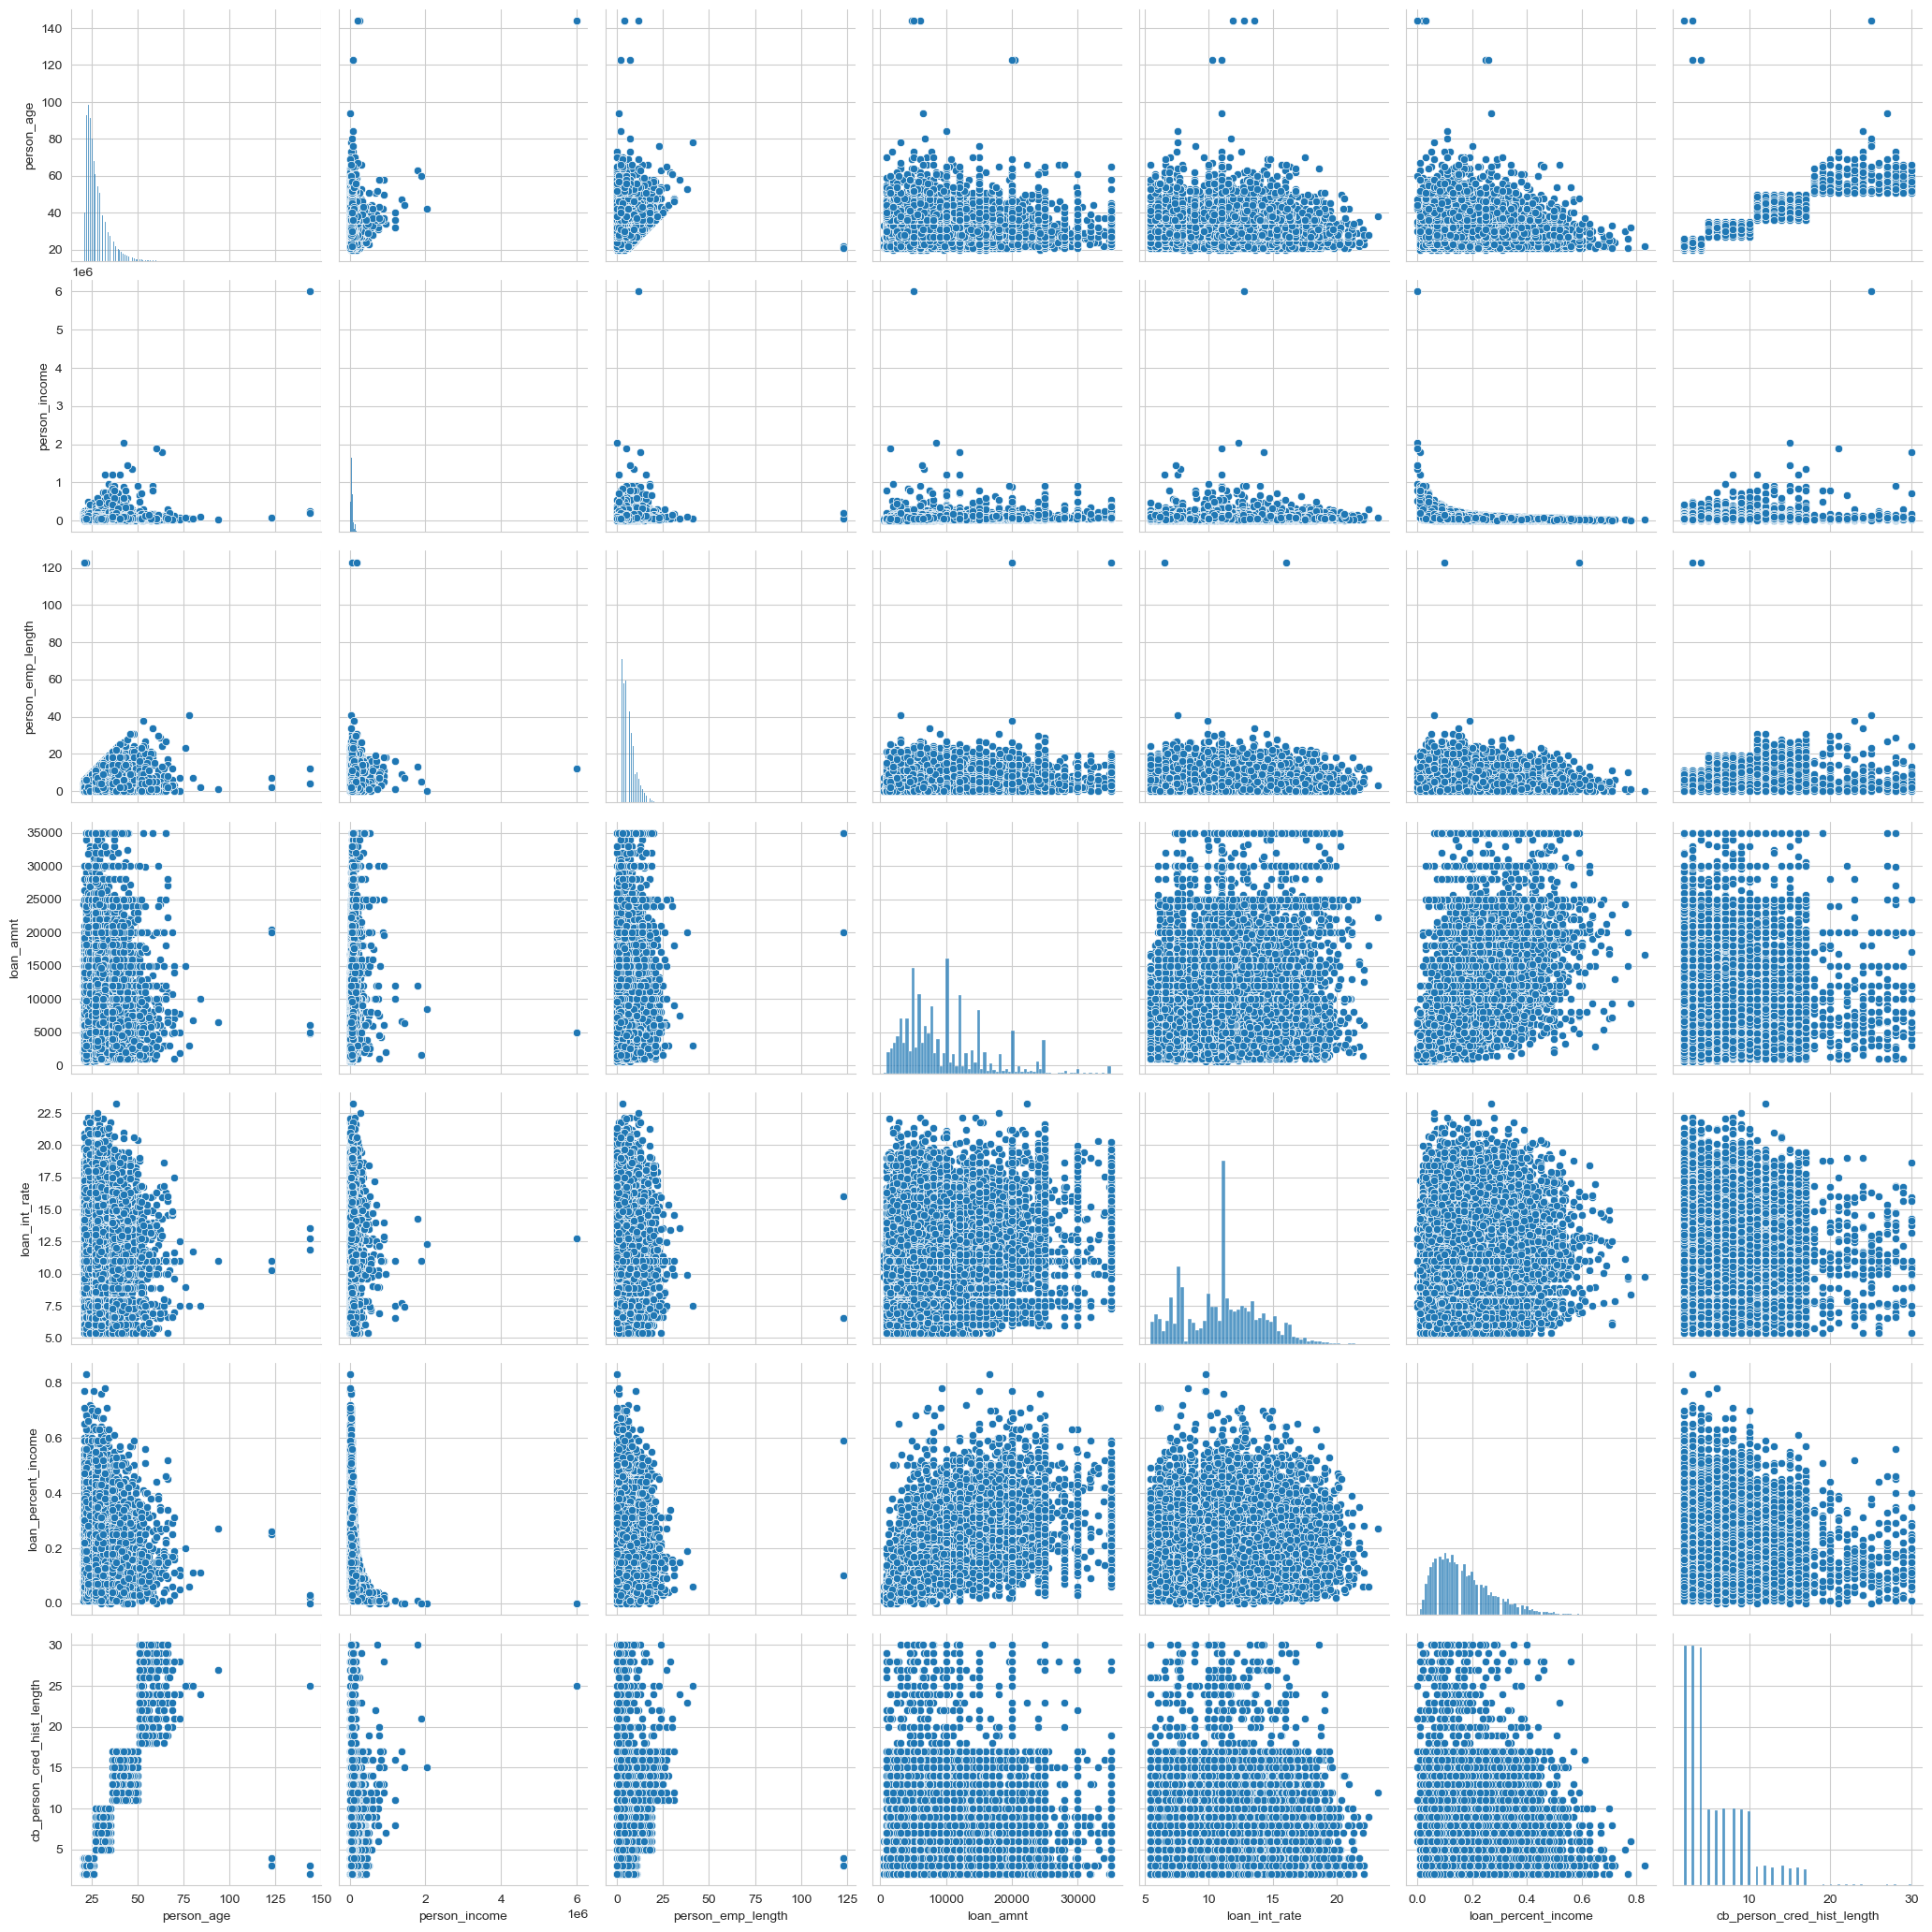

In [95]:
sns.pairplot(numerical_df,height=3)
plt.show()


# b. Discrete vs Discrete Data

In [96]:
pd.crosstab(df['loan_status'],df['person_home_ownership'])

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,10511,67,2104,10743
1,1493,32,154,4823


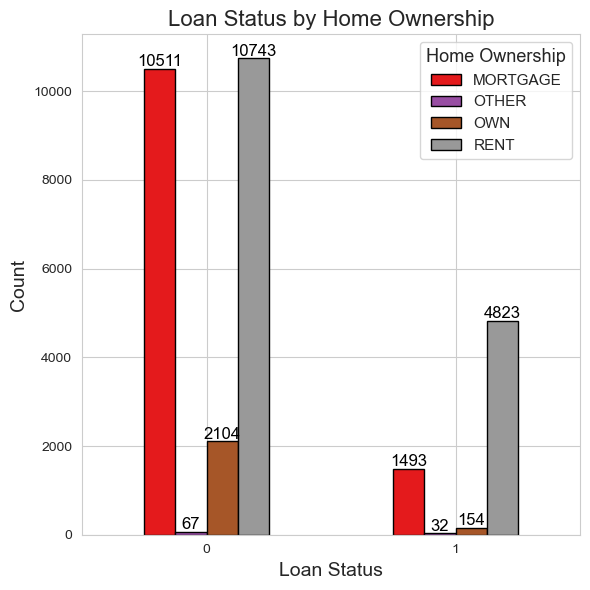

In [99]:
tab = pd.crosstab(df['loan_status'], df['person_home_ownership'])
ax = tab.plot(kind='bar', figsize=(6, 6), colormap='Set1', edgecolor='black')
plt.title('Loan Status by Home Ownership', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black')
plt.xticks(rotation=0)
plt.legend(title='Home Ownership', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


# Insights:
+ We can observe the distribution of loan statuses (default and non-default) across different categories of home ownership. It suggests that individuals categorized as RENT have a higher count of defaulted loans compared to other home ownership categories, while individuals with a MORTGAGE have a relatively lower count of defaulted loans.

In [100]:
pd.crosstab(df['loan_status'],df['loan_intent'])

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,3421,4985,2412,4135,4022,4450
1,1347,1027,857,1491,1003,777


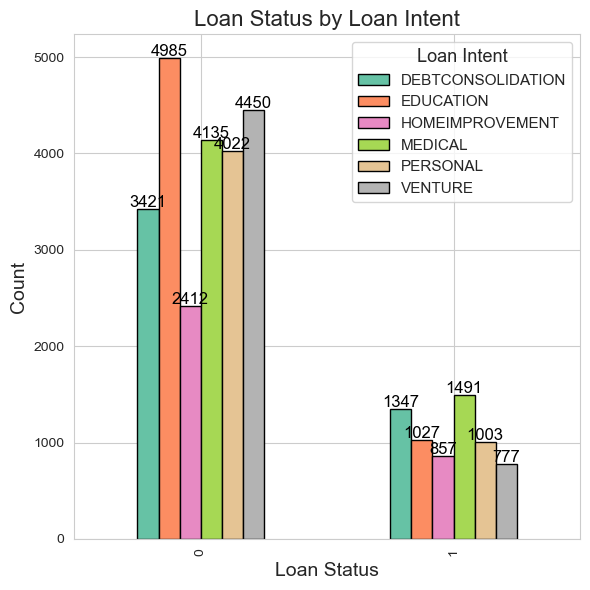

In [111]:
tab = pd.crosstab(df['loan_status'], df['loan_intent'])
ax = tab.plot(kind='bar', figsize=(6, 6), colormap='Set2', edgecolor='black')
plt.title('Loan Status by Loan Intent', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Intent', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


In [112]:
pd.crosstab(df['loan_status'], df['cb_person_default_on_file'])

cb_person_default_on_file,N,Y
loan_status,,
0,20139,3286
1,4516,1986


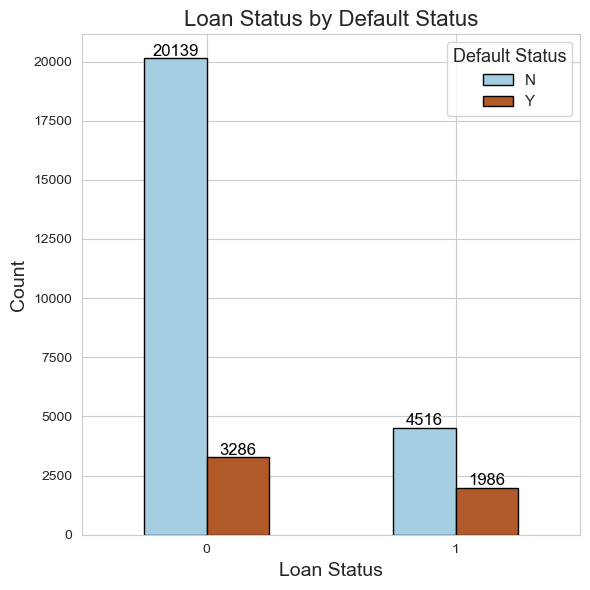

In [114]:
tab = pd.crosstab(df['loan_status'], df['cb_person_default_on_file'])
ax = tab.plot(kind='bar', figsize=(6, 6), colormap='Paired', edgecolor='black')
plt.title('Loan Status by Default Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black')
plt.xticks(rotation=0)
plt.legend(title='Default Status', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


In [115]:
pd.crosstab(df['loan_status'], df['cb_person_cred_hist_length'])



cb_person_cred_hist_length,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
loan_status,,,,,,,,,,,,,,,,,,,,,
0,4296,4369,4308,1369,1353,1395,1367,1365,1326,317,...,290,316,271,13,12,15,11,15,17,18
1,1309,1241,1248,355,353,346,364,358,335,77,...,81,86,65,4,3,7,4,4,2,4


<Axes: ylabel='loan_status'>

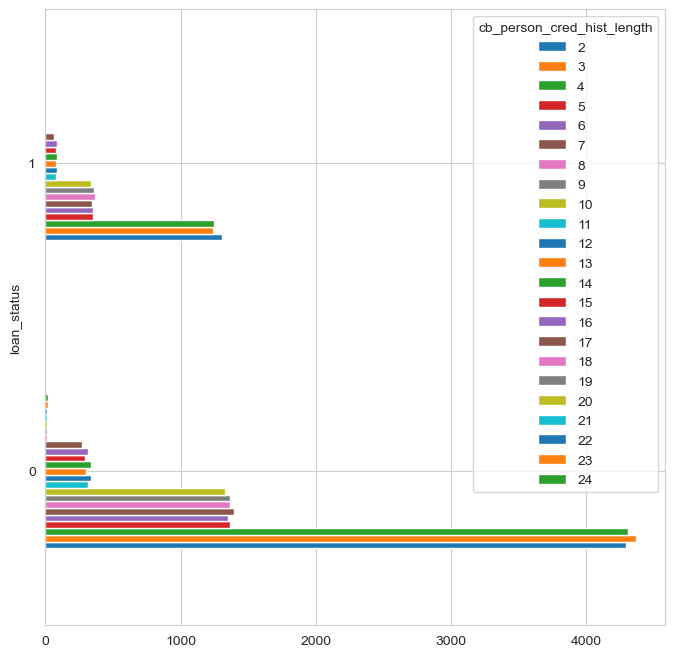

In [117]:
tab=pd.crosstab(df['loan_status'], df['cb_person_cred_hist_length'])
tab.plot(kind='barh',figsize=(8,8))

# c. Continuous Numerical vs Discrete Data

In [118]:
group= df.groupby('loan_status')

group['person_income'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
loan_status,,,,
0,7000,149981,63246.541942,59000.0
1,4000,148750,46437.637650,41500.0


<Figure size 1000x600 with 0 Axes>

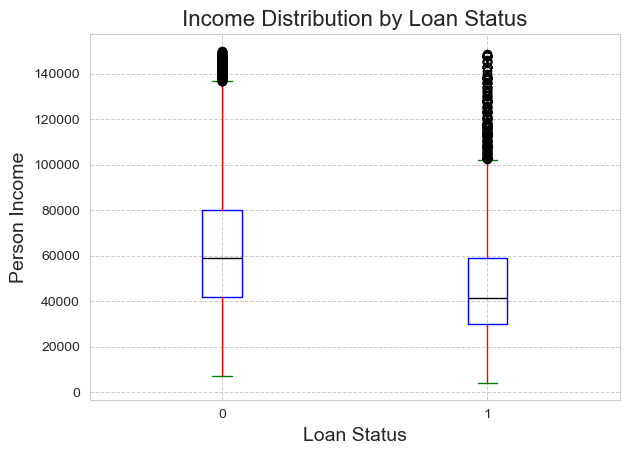

In [119]:
plt.figure(figsize=(10, 6))
ax = df.boxplot(by='loan_status', column='person_income', grid=False, 
                boxprops=dict(color='blue'), 
                whiskerprops=dict(color='red'), 
                capprops=dict(color='green'),
                medianprops=dict(color='black'))
plt.title('Income Distribution by Loan Status', fontsize=16)
plt.suptitle('') 
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Person Income', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


# Insights:

**Difference in Income Distribution:**
+ The minimum and maximum income values for both loan status groups vary, indicating differences in the income distribution among borrowers.
+ For loan_status 0, the minimum income is 7,000 and the maximum is 149,981, while for loan_status 1, the minimum is 4,000 and the maximum is 148,750.

**Average Income:**
+ The mean (average) income for borrowers with loan_status 0 is 63,246.54,   while for loan_status 1, it is 46,437.64. This suggests that, on average, borrowers with loan_status 0 have higher incomes compared to borrowers with loan_status 1.

**Median Income:**
+ The median income, which represents the middle value when all incomes are arranged in ascending order, is also higher for loan_status 0 (59,000) compared to loan_status 1 (41,500). This further supports the observation that borrowers with loan_status 0 tend to have higher incomes than those with loan_status 1.

**Income Disparity and Loan Status:**
+ The data indicates a potential relationship between loan status and personal income, where borrowers with loan_status 0 generally have higher incomes on average compared to borrowers with loan_status 1.
+ This difference in income distribution may influence various aspects of borrowing behavior, including loan eligibility, loan terms, and borrowing capacity.

In [121]:
group = df.groupby('loan_status')

group['loan_int_rate'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
loan_status,,,,
0,5.42,19.91,10.486635,10.99
1,5.42,19.91,12.824854,12.99


<Figure size 1000x600 with 0 Axes>

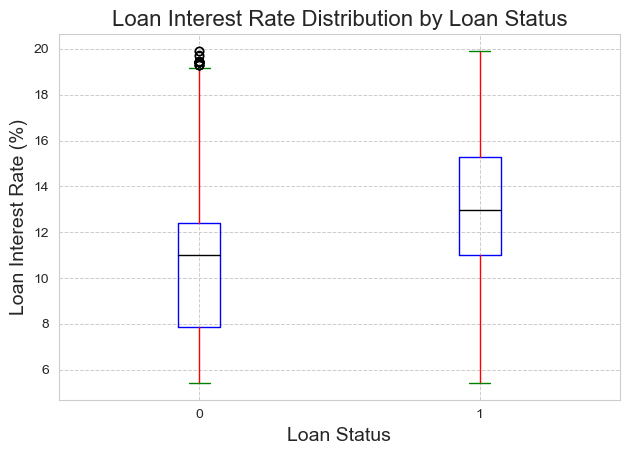

In [120]:
plt.figure(figsize=(10, 6))
ax = df.boxplot(by='loan_status', column='loan_int_rate', grid=False,
                boxprops=dict(color='blue'),
                whiskerprops=dict(color='red'),
                capprops=dict(color='green'),
                medianprops=dict(color='black'))
plt.title('Loan Interest Rate Distribution by Loan Status', fontsize=16)
plt.suptitle('')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Interest Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


# Insights:

**Difference in Average and Median Rates:**
+ The mean and median interest rates for loan_status 1 are higher than those for loan_status 0. This suggests a potential relationship where borrowers with loan_status 1 tend to receive loans with higher interest rates on average compared to borrowers with loan_status 0.

**Consistency in Range:**
+ Both loan status groups have the same minimum and maximum interest rates, indicating that the range of interest rates offered to borrowers is consistent across both groups. This suggests that lenders offer the same spectrum of interest rate options regardless of loan status.

**Statistical Significance:**
+ The difference in mean and median interest rates between the two groups indicates a potential statistical significance in the relationship between loan status and interest rates. However, further statistical tests would be required to confirm the significance of these differences.

**Potential Factors:**
+ The observed differences in interest rates could be influenced by various factors such as creditworthiness, loan terms, market conditions, or lender policies. Understanding these factors could provide deeper insights into the relationship between loan status and interest rates.

In [122]:
group = df.groupby('loan_status')

group['loan_percent_income'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
loan_status,,,,
0,0.01,0.59,0.150948,0.14
1,0.01,0.59,0.246167,0.24


<Figure size 1000x600 with 0 Axes>

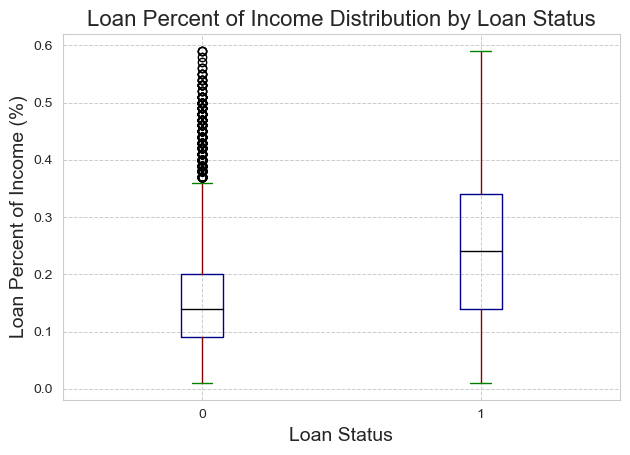

In [123]:
plt.figure(figsize=(10, 6))
ax = df.boxplot(by='loan_status', column='loan_percent_income', grid=False,
                boxprops=dict(color='darkblue'),
                whiskerprops=dict(color='darkred'),
                capprops=dict(color='green'),
                medianprops=dict(color='black'))
plt.title('Loan Percent of Income Distribution by Loan Status', fontsize=16)
plt.suptitle('') 
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Percent of Income (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


# Insights:

* Loan Percent Income Distribution: The plot illustrates the distribution of loan percent income for two groups categorized by loan status (0 and 1).
* Median Comparison: You can observe that the median loan percent income is higher for loan_status 1 compared to loan_status 0. This suggests that, on average, individuals with a loan status of 1 tend to have a higher percentage of their income dedicated to loans.
* Variability: The size of the box (interquartile range) indicates the spread of the data. A larger box for loan_status 0 compared to loan_status 1 suggests that there's more variability in loan percent income among individuals with loan_status 0.
* Outliers: The presence of outliers beyond the whiskers indicates extreme values in loan percent income for both loan status groups. However, there may be more outliers for loan_status 0.

# In conclusion, our analysis of loan approval using credit score data revealed several key insights. Credit scores play a vital role in determining loan eligibility, but other factors like income and employment status also influence approval decisions. Lenders can optimize risk management by considering these factors. Recommendations include refining underwriting criteria and targeting specific customer segments. Moving forward, further research could explore additional variables and regulatory impacts. Overall, leveraging data-driven insights can enhance lending practices, ensuring fair and efficient outcomes for borrowers and lenders alike.